In [1]:
#fix random seed
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)
#import libraries
import numpy as np
import numpy
from numpy import array
from numpy import concatenate
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import math
from math import sqrt
#keras is the main package for nn and deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
#considering LSTM nets
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout
#if the training goes wrong
from keras.callbacks import EarlyStopping
import statsmodels.api as sm

In [2]:
#convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	#input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	#forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	#put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	#drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [3]:
#import files
from google.colab import files
 
 
uploaded = files.upload()

Saving cls_radio_flux_f8.csv to cls_radio_flux_f8.csv
Saving cls_radio_flux_f15.csv to cls_radio_flux_f15.csv
Saving cls_radio_flux_f30.csv to cls_radio_flux_f30.csv
Saving cls_radio_flux_f32.csv to cls_radio_flux_f32.csv
Saving cls_radio_flux_f107.csv to cls_radio_flux_f107.csv


In [4]:
#create a list of dataframes
df=[]    
df.append(pd.read_csv('cls_radio_flux_f8.csv'))
df.append(pd.read_csv('cls_radio_flux_f15.csv'))
df.append(pd.read_csv('cls_radio_flux_f30.csv'))
df.append(pd.read_csv('cls_radio_flux_f32.csv'))
df.append(pd.read_csv('cls_radio_flux_f107.csv'))

In [5]:
#join datasets
df[0]=df[0][['time (yyyy MM dd)','absolute_f8 (solar flux unit (SFU))']]
df[0]['absolute_f15 (solar flux unit (SFU))']=df[1]['absolute_f15 (solar flux unit (SFU))']
df[0]['absolute_f30 (solar flux unit (SFU))']=df[2]['absolute_f30 (solar flux unit (SFU))']
df[0]['absolute_f32 (solar flux unit (SFU))']=df[3]['absolute_f32 (solar flux unit (SFU))']
df[0]['absolute_f107 (solar flux unit (SFU))']=df[4]['absolute_f107 (solar flux unit (SFU))']

In [6]:
#change name
df = df[0]

In [7]:
#dataframe without dates
y = df[['absolute_f8 (solar flux unit (SFU))',	'absolute_f15 (solar flux unit (SFU))',	'absolute_f30 (solar flux unit (SFU))',	'absolute_f32 (solar flux unit (SFU))',	'absolute_f107 (solar flux unit (SFU))']]
n_vars = y.shape[1]

In [8]:
#compute lenght for graphs
X = ([x for x in range(0, len(y['absolute_f8 (solar flux unit (SFU))']))])

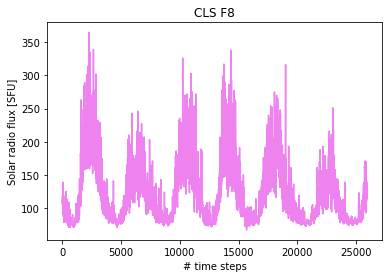

In [9]:
plt.title('CLS F8')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f8 (solar flux unit (SFU))'], color = 'violet', label = 'cls f8 original')

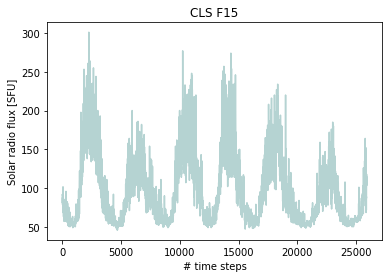

In [10]:
plt.title('CLS F15')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f15 (solar flux unit (SFU))'], color = '#b5d3d2', label = 'cls f15 original')

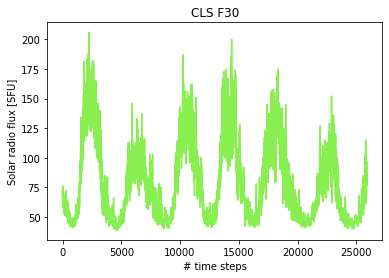

In [11]:
plt.title('CLS F30')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f30 (solar flux unit (SFU))'], color = '#89ef51', label = 'cls f30 original')

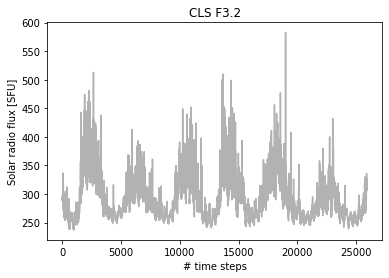

In [12]:
plt.title('CLS F3.2')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f32 (solar flux unit (SFU))'], color = '#b2b2b2', label = 'cls f32 original')

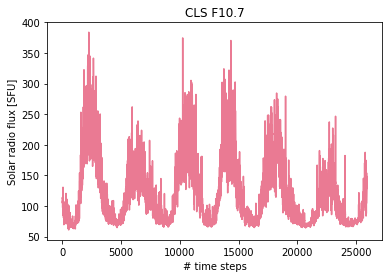

In [13]:
plt.title('CLS F10.7')
plt.xlabel('# time steps')
plt.ylabel('Solar radio flux [SFU]')
plt.plot(X, y['absolute_f107 (solar flux unit (SFU))'], color = '#ea7a93', label = 'cls f107 original')

In [14]:
#NumPy representation
values = y.values
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [16]:
#reframe for supervised learning
nin = 13
nout = 27
reframed = series_to_supervised(scaled, nin, nout)
reframed

,var1(t-13),var2(t-13),var3(t-13),var4(t-13),var5(t-13),var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),...,var1(t+25),var2(t+25),var3(t+25),var4(t+25),var5(t+25),var1(t+26),var2(t+26),var3(t+26),var4(t+26),var5(t+26)
13,0.149329,0.160784,0.188024,0.157895,0.143653,0.141611,0.153333,0.181437,0.152689,0.135604,...,0.090604,0.103529,0.143114,0.128687,0.076471,0.080537,0.093725,0.135329,0.115095,0.082972
14,0.141611,0.153333,0.181437,0.152689,0.135604,0.139597,0.149412,0.176647,0.152689,0.139938,...,0.080537,0.093725,0.135329,0.115095,0.082972,0.080537,0.099608,0.143114,0.108155,0.078947
15,0.139597,0.149412,0.176647,0.152689,0.139938,0.131879,0.135686,0.160479,0.152111,0.143344,...,0.080537,0.099608,0.143114,0.108155,0.078947,0.080537,0.098824,0.138922,0.118276,0.092570
16,0.131879,0.135686,0.160479,0.152111,0.143344,0.150671,0.164706,0.191617,0.152689,0.164396,...,0.080537,0.098824,0.138922,0.118276,0.092570,0.097315,0.104314,0.138922,0.136206,0.095975
17,0.150671,0.164706,0.191617,0.152689,0.164396,0.161074,0.178039,0.204192,0.160787,0.164706,...,0.097315,0.104314,0.138922,0.136206,0.095975,0.120805,0.114902,0.144910,0.152979,0.112384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25872,0.137584,0.157255,0.245509,0.181608,0.117337,0.110738,0.134118,0.215569,0.155581,0.094737,...,0.191275,0.239608,0.269461,0.213418,0.229412,0.194631,0.236863,0.281437,0.222094,0.229412
25873,0.110738,0.134118,0.215569,0.155581,0.094737,0.090604,0.112549,0.191617,0.155581,0.084830,...,0.194631,0.236863,0.281437,0.222094,0.229412,0.191275,0.241176,0.293413,0.216310,0.229412
25874,0.090604,0.112549,0.191617,0.155581,0.084830,0.093960,0.101961,0.173653,0.161365,0.084830,...,0.191275,0.241176,0.293413,0.216310,0.229412,0.204698,0.245098,0.311377,0.224986,0.235604
25875,0.093960,0.101961,0.173653,0.161365,0.084830,0.104027,0.100784,0.173653,0.175824,0.083282,...,0.204698,0.245098,0.311377,0.224986,0.235604,0.218121,0.254902,0.305389,0.230769,0.235604


In [17]:
#drop columns not to be predicted
reframedd = reframed.iloc[:,0:nin*n_vars-1]
for i in range(nin*n_vars-1, reframed.shape[1], n_vars):
  reframedd= pd.concat([reframedd, reframed.iloc[:,i]], axis=1)

reframedd

,var1(t-13),var2(t-13),var3(t-13),var4(t-13),var5(t-13),var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),...,var5(t+17),var5(t+18),var5(t+19),var5(t+20),var5(t+21),var5(t+22),var5(t+23),var5(t+24),var5(t+25),var5(t+26)
13,0.149329,0.160784,0.188024,0.157895,0.143653,0.141611,0.153333,0.181437,0.152689,0.135604,...,0.133437,0.114861,0.105263,0.105573,0.097214,0.073994,0.086997,0.083282,0.076471,0.082972
14,0.141611,0.153333,0.181437,0.152689,0.135604,0.139597,0.149412,0.176647,0.152689,0.139938,...,0.114861,0.105263,0.105573,0.097214,0.073994,0.086997,0.083282,0.076471,0.082972,0.078947
15,0.139597,0.149412,0.176647,0.152689,0.139938,0.131879,0.135686,0.160479,0.152111,0.143344,...,0.105263,0.105573,0.097214,0.073994,0.086997,0.083282,0.076471,0.082972,0.078947,0.092570
16,0.131879,0.135686,0.160479,0.152111,0.143344,0.150671,0.164706,0.191617,0.152689,0.164396,...,0.105573,0.097214,0.073994,0.086997,0.083282,0.076471,0.082972,0.078947,0.092570,0.095975
17,0.150671,0.164706,0.191617,0.152689,0.164396,0.161074,0.178039,0.204192,0.160787,0.164706,...,0.097214,0.073994,0.086997,0.083282,0.076471,0.082972,0.078947,0.092570,0.095975,0.112384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25872,0.137584,0.157255,0.245509,0.181608,0.117337,0.110738,0.134118,0.215569,0.155581,0.094737,...,0.232508,0.207740,0.235604,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412
25873,0.110738,0.134118,0.215569,0.155581,0.094737,0.090604,0.112549,0.191617,0.155581,0.084830,...,0.207740,0.235604,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412,0.229412
25874,0.090604,0.112549,0.191617,0.155581,0.084830,0.093960,0.101961,0.173653,0.161365,0.084830,...,0.235604,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412,0.229412,0.235604
25875,0.093960,0.101961,0.173653,0.161365,0.084830,0.104027,0.100784,0.173653,0.175824,0.083282,...,0.235604,0.235604,0.263467,0.266563,0.229412,0.229412,0.229412,0.229412,0.235604,0.235604


In [18]:
#NumPy
values=reframedd.values

In [19]:
#split into train and test
train_size = int(len(reframedd['var1(t-1)'] ) * 0.8)
train = values[:train_size, :]
test = values[train_size:, :]

In [20]:
#split into inputs and outputs
n_obs = nin*n_vars
train_X, train_y = train[:, :n_obs], train[:, -nout:]
test_X, test_y = test[:, :n_obs], test[:, -nout:]
print(train_X.shape, len(train_X), train_y.shape)
train_y

(20691, 65) 20691 (20691, 27)


array([[0.12291022, 0.12352941, 0.12074303, ..., 0.08328173, 0.07647059,
        0.08297214],
       [0.12352941, 0.12074303, 0.12724458, ..., 0.07647059, 0.08297214,
        0.07894737],
       [0.12074303, 0.12724458, 0.11702786, ..., 0.08297214, 0.07894737,
        0.09256966],
       ...,
       [0.0126935 , 0.01578947, 0.01393189, ..., 0.01578947, 0.01702786,
        0.01424149],
       [0.01578947, 0.01393189, 0.01424149, ..., 0.01702786, 0.01424149,
        0.01609907],
       [0.01393189, 0.01424149, 0.01578947, ..., 0.01424149, 0.01609907,
        0.01640867]])

In [21]:
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], nin, n_vars))
test_X = test_X.reshape((test_X.shape[0], nin, n_vars))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(20691, 13, 5) (20691, 27) (5173, 13, 5) (5173, 27)


In [22]:
#number of neurons
nn = 9

In [23]:
#architechture
model = Sequential()
#input layer
model.add(LSTM(nn, return_sequences=True, activation='tanh', input_shape=(train_X.shape[1], train_X.shape[2])))
#first hidden layer
model.add(LSTM(nn, activation='tanh', return_sequences=True))
#second
model.add(LSTM(nn, activation='tanh'))
# output set to forecast nout values
model.add(Dense(nout))
#compile
model.compile(optimizer = 'adam', loss = 'mse')
#summarize
model.summary()
#fit
history=model.fit(train_X, train_y, epochs = 36, batch_size = 2, verbose = 2, validation_split = 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 9)             540       
                                                                 
 lstm_1 (LSTM)               (None, 13, 9)             684       
                                                                 
 lstm_2 (LSTM)               (None, 9)                 684       
                                                                 
 dense (Dense)               (None, 27)                270       
                                                                 
Total params: 2,178
Trainable params: 2,178
Non-trainable params: 0
_________________________________________________________________
Epoch 1/36
8276/8276 - 57s - loss: 0.0063 - val_loss: 0.0050 - 57s/epoch - 7ms/step
Epoch 2/36
8276/8276 - 52s - loss: 0.0049 - val_loss: 0.0050 - 52s/epoch - 6ms/step
Epoch 3/36
8276/82

In [24]:
#make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

162/162 [==============================] - 1s 3ms/step


In [25]:
#NumPy
reframedd = reframedd.values

In [26]:
#compute and make a list of all the rmse, predicted and observed values, and relative error
rmse = []
pred = []
obs = []
re = []
for i in range(0, nout):
  a = pd.DataFrame(reframedd[train_size:, :4])
  a['pred']=testPredict[:, i]
  a = scaler.inverse_transform(a)
  a = pd.DataFrame(a)
  b = pd.DataFrame(reframedd[train_size:, :4])
  b['obs'] = reframedd[train_size:, -(nout-i)]
  b = scaler.inverse_transform(b)
  b = pd.DataFrame(b)
  aa = pd.DataFrame()
  aa['pred'] = a[4]
  pred.append(aa['pred'])
  aa['obs'] = b[4]
  obs.append(aa['obs'])
  aa['diff'] = aa['obs']-aa['pred']
  aa['abs_error'] = abs(aa['diff'])
  aa['relative_error'] = aa['abs_error']/aa['obs']
  re.append(aa['relative_error'])
  from sklearn.metrics import mean_squared_error
  rms = np.sqrt(mean_squared_error(aa['obs'], aa['pred']))
  rmse.append(rms)

In [27]:
#denormalize training
predd=[]
obss=[]
for i in range(0, nout):
  a = pd.DataFrame(reframedd[:train_size, :4])
  a['pred']=trainPredict[:, i]
  a = scaler.inverse_transform(a)
  a = pd.DataFrame(a)
  predd.append(a[4])
  b = pd.DataFrame(reframedd[:train_size, :4])
  b['obs'] = reframedd[:train_size, -(nout-i)]
  b = scaler.inverse_transform(b)
  b = pd.DataFrame(b)
  obss.append(b[4])

In [28]:
#print rmse
rmse

[5.330375985586743,
 6.989043897448761,
 8.669987188052191,
 9.935575592839044,
 11.257550718609737,
 12.307664465351435,
 13.206060729590996,
 13.915173233915402,
 14.384412557474215,
 14.735912303123937,
 14.96124330055422,
 15.143392152145125,
 15.208110352775766,
 15.22234543193042,
 15.141862270670368,
 15.1195642734029,
 15.004830212827764,
 14.894070464278613,
 14.784996856137141,
 14.641574112634023,
 14.56142673723506,
 14.463719943195835,
 14.493799432334578,
 14.587161160001274,
 14.68910315351578,
 14.854547764224849,
 15.058471290483759]

In [29]:
#predictions for the last 27 days of the test set
predictions=[]
for i in range(nout):
  predictions.append(pred[i][len(pred[i])-1])
predictions

[128.4133841782808,
 128.63530544340608,
 127.86000087261199,
 125.63713509738444,
 122.53121925294398,
 120.45972950160503,
 118.14943903088569,
 115.65048564374446,
 113.17421627938747,
 111.00299961268901,
 109.05551874041556,
 107.76627401411533,
 106.68429955244063,
 105.71879188120364,
 105.15242771208285,
 104.93823143243789,
 104.34689221680163,
 104.19564133286475,
 104.59561268389224,
 105.19227516055106,
 106.06736921668052,
 107.51604705452918,
 108.61027079224586,
 110.10322410762309,
 111.38970612883567,
 112.64331003427505,
 113.23853340148925]

In [30]:
#delete last 2 predictions
gp=[]
for i in range(0, nout-2):
  gp.append(predictions[i])

In [31]:
#idem on error
err=[]
for i in range(0, nout-2):
  err.append(rmse[i])

In [32]:
#length
l=[]
for i in range(0, nout-2):
  l.append(i)

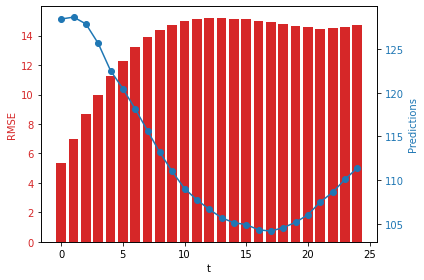

In [33]:
#bar graph for RMSE
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('t')
ax1.set_ylabel('RMSE', color=color)
plt.bar(l, err, color=color)
ax1.tick_params(axis='y', labelcolor=color)

#predictions
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Predictions', color=color)
ax2.plot(l, gp, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.show()

In [34]:
#to shift test
z= ([x for x in range(train_size, train_size+len(testPredict))])

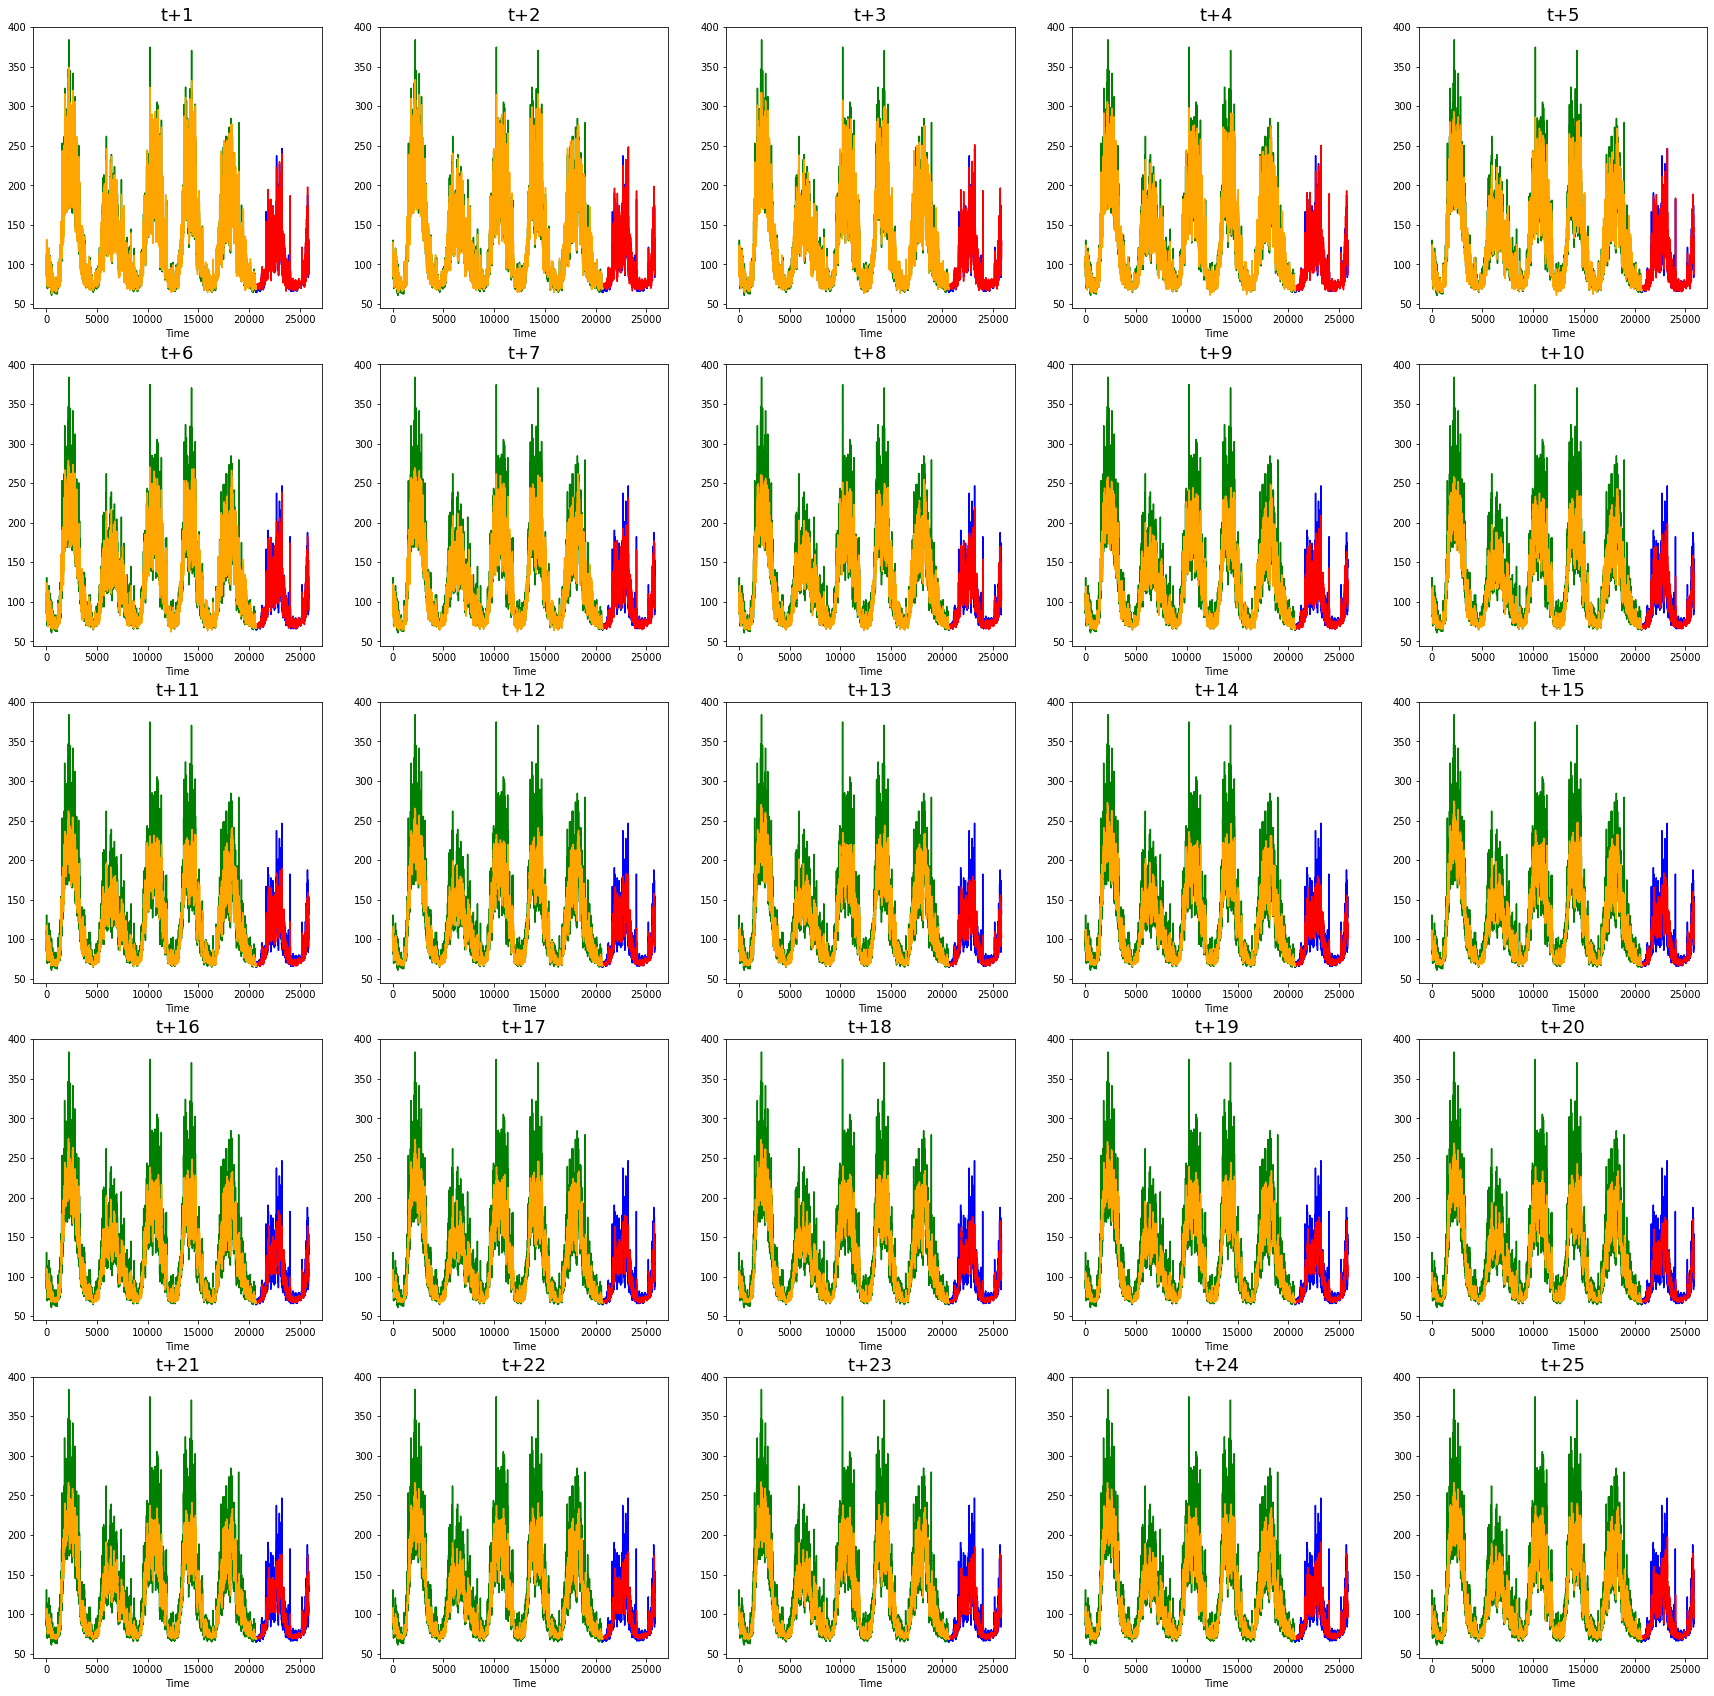

In [35]:
#train and test observed and predicted 
fig, axes = plt.subplots(5, 5, figsize = (30, 30))
for i in range(1, nout-1):
  plt.subplot(5, 5, i)
  plt.plot(obss[i],color='green')
  plt.plot(z, obs[i], color='blue')
  plt.plot(z, pred[i], color='red')
  plt.plot(predd[i],color='orange')
  plt.title('t+%d' % i, fontsize= 18)
  plt.xlabel('Time', fontsize = 10)

Text(0.5, 1.0, 't')

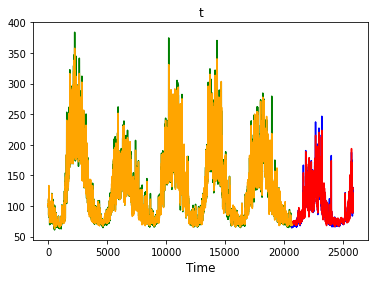

In [36]:
#predictions and observed for t
plt.plot(obss[0],color='green')
plt.plot(z, obs[0],color='blue')
plt.plot(z, pred[0],color='red')
plt.plot(predd[0],color='orange')
plt.xlabel('Time', fontsize = 12)
plt.title('t')

Text(0.5, 1.0, 't+14')

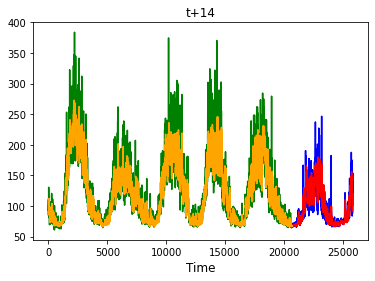

In [37]:
#predictions and observed for t+14
plt.plot(obss[14],color='green')
plt.plot(z, obs[14],color='blue')
plt.plot(z, pred[14],color='red')
plt.plot(predd[14],color='orange')
plt.xlabel('Time', fontsize = 12)
plt.title('t+14')

Text(0.5, 1.0, 't+26')

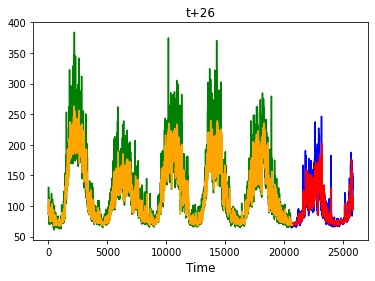

In [38]:
#predictions and observed for t+26 
plt.plot(obss[26],color='green')
plt.plot(z, obs[26],color='blue')
plt.plot(z, pred[26],color='red')
plt.plot(predd[26],color='orange')
plt.xlabel('Time', fontsize = 12)
plt.title('t+26')

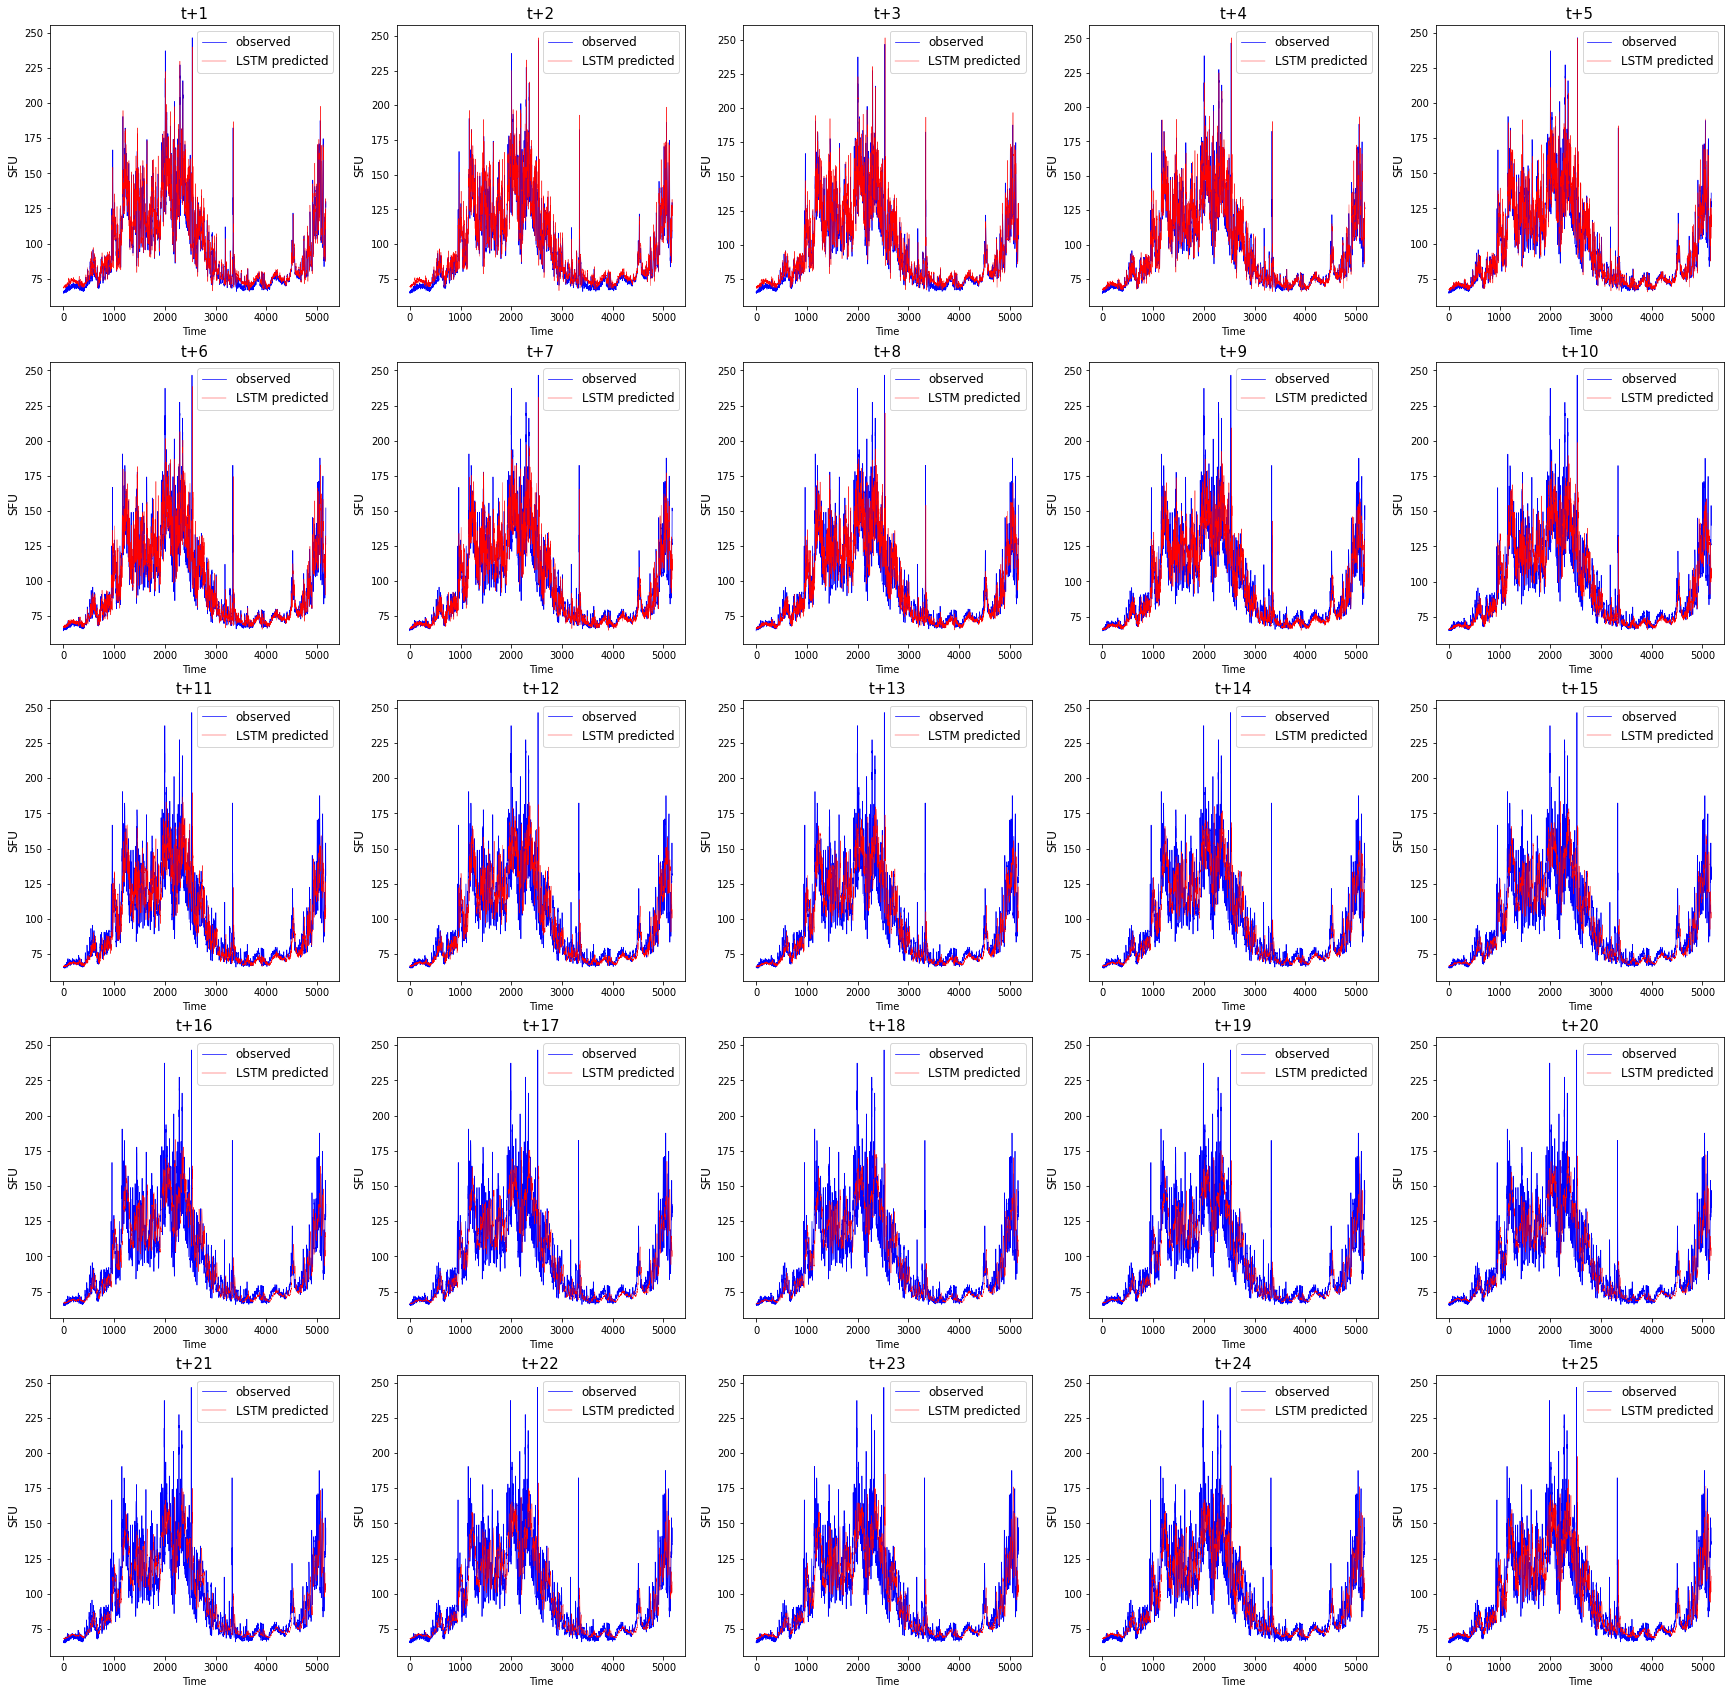

In [39]:
# graphs of +1, ..., +25 predictions (test detail)
fig, axes = plt.subplots(5, 5, figsize = (30, 30))
for i in range(1, nout-1):
  plt.subplot(5, 5, i)
  plt.plot(obs[i], linewidth = 0.7, color = 'b',label = 'observed')
  plt.plot(pred[i], linewidth = 0.4, color = 'r',label = 'LSTM predicted')
  plt.legend(fontsize = 12)
  plt.ylabel('SFU', fontsize = 12)
  plt.xlabel('Time', fontsize = 10)
  plt.title('t+%d' % i, fontsize=15)

Text(0.5, 1.0, 't')

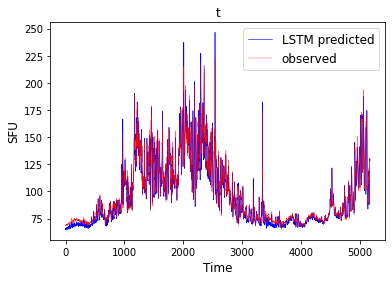

In [40]:
#nowcast graph
plt.plot(obs[0], linewidth = 0.6, color = 'b', label = 'LSTM predicted')
plt.plot(pred[0], linewidth = 0.3, color = 'r', label = 'observed')
plt.legend(fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.title('t')

Text(0.5, 1.0, 't+14')

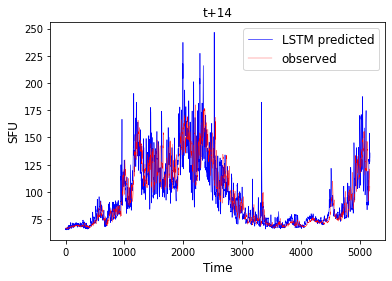

In [41]:
#graph of +14 prediction
plt.plot(obs[14],linewidth = 0.6, color='b', label = 'LSTM predicted')
plt.plot(pred[14],linewidth = 0.3, color='r', label = 'observed')
plt.legend(fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.title('t+14')

Text(0.5, 1.0, 't+26')

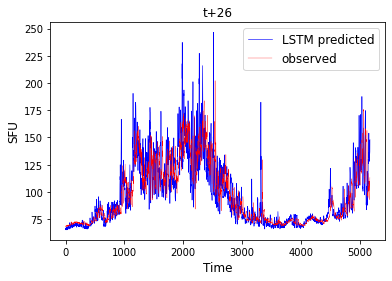

In [42]:
#graph of +26 prediction
plt.plot(obs[26],linewidth = 0.6, color='b', label = 'LSTM predicted')
plt.plot(pred[26],linewidth = 0.3, color='r', label = 'observed')
plt.legend(fontsize = 12)
plt.xlabel('Time', fontsize = 12)
plt.ylabel('SFU', fontsize = 12)
plt.title('t+26')

In [43]:
#compute the total errors and show it
tot_err = []
for i in range(0, nout):
  tot_err.append(re[i].sum())
tot_err

[173.07712786072716,
 228.46875616519543,
 291.65065959848437,
 317.828147088096,
 333.2488628823406,
 366.96041970831,
 395.114880427696,
 416.205976634898,
 433.9641363813586,
 449.9179552121816,
 458.1051865614072,
 465.5936425144006,
 466.25373647249035,
 469.85867407553786,
 466.6892564957783,
 466.01224998558587,
 461.6622796757101,
 458.19946894599667,
 455.2397008467947,
 447.2229948015289,
 442.66526225659516,
 442.5258995151585,
 442.03046722348654,
 444.0974620441224,
 448.67918702173733,
 453.15921732723916,
 458.8503063890422]

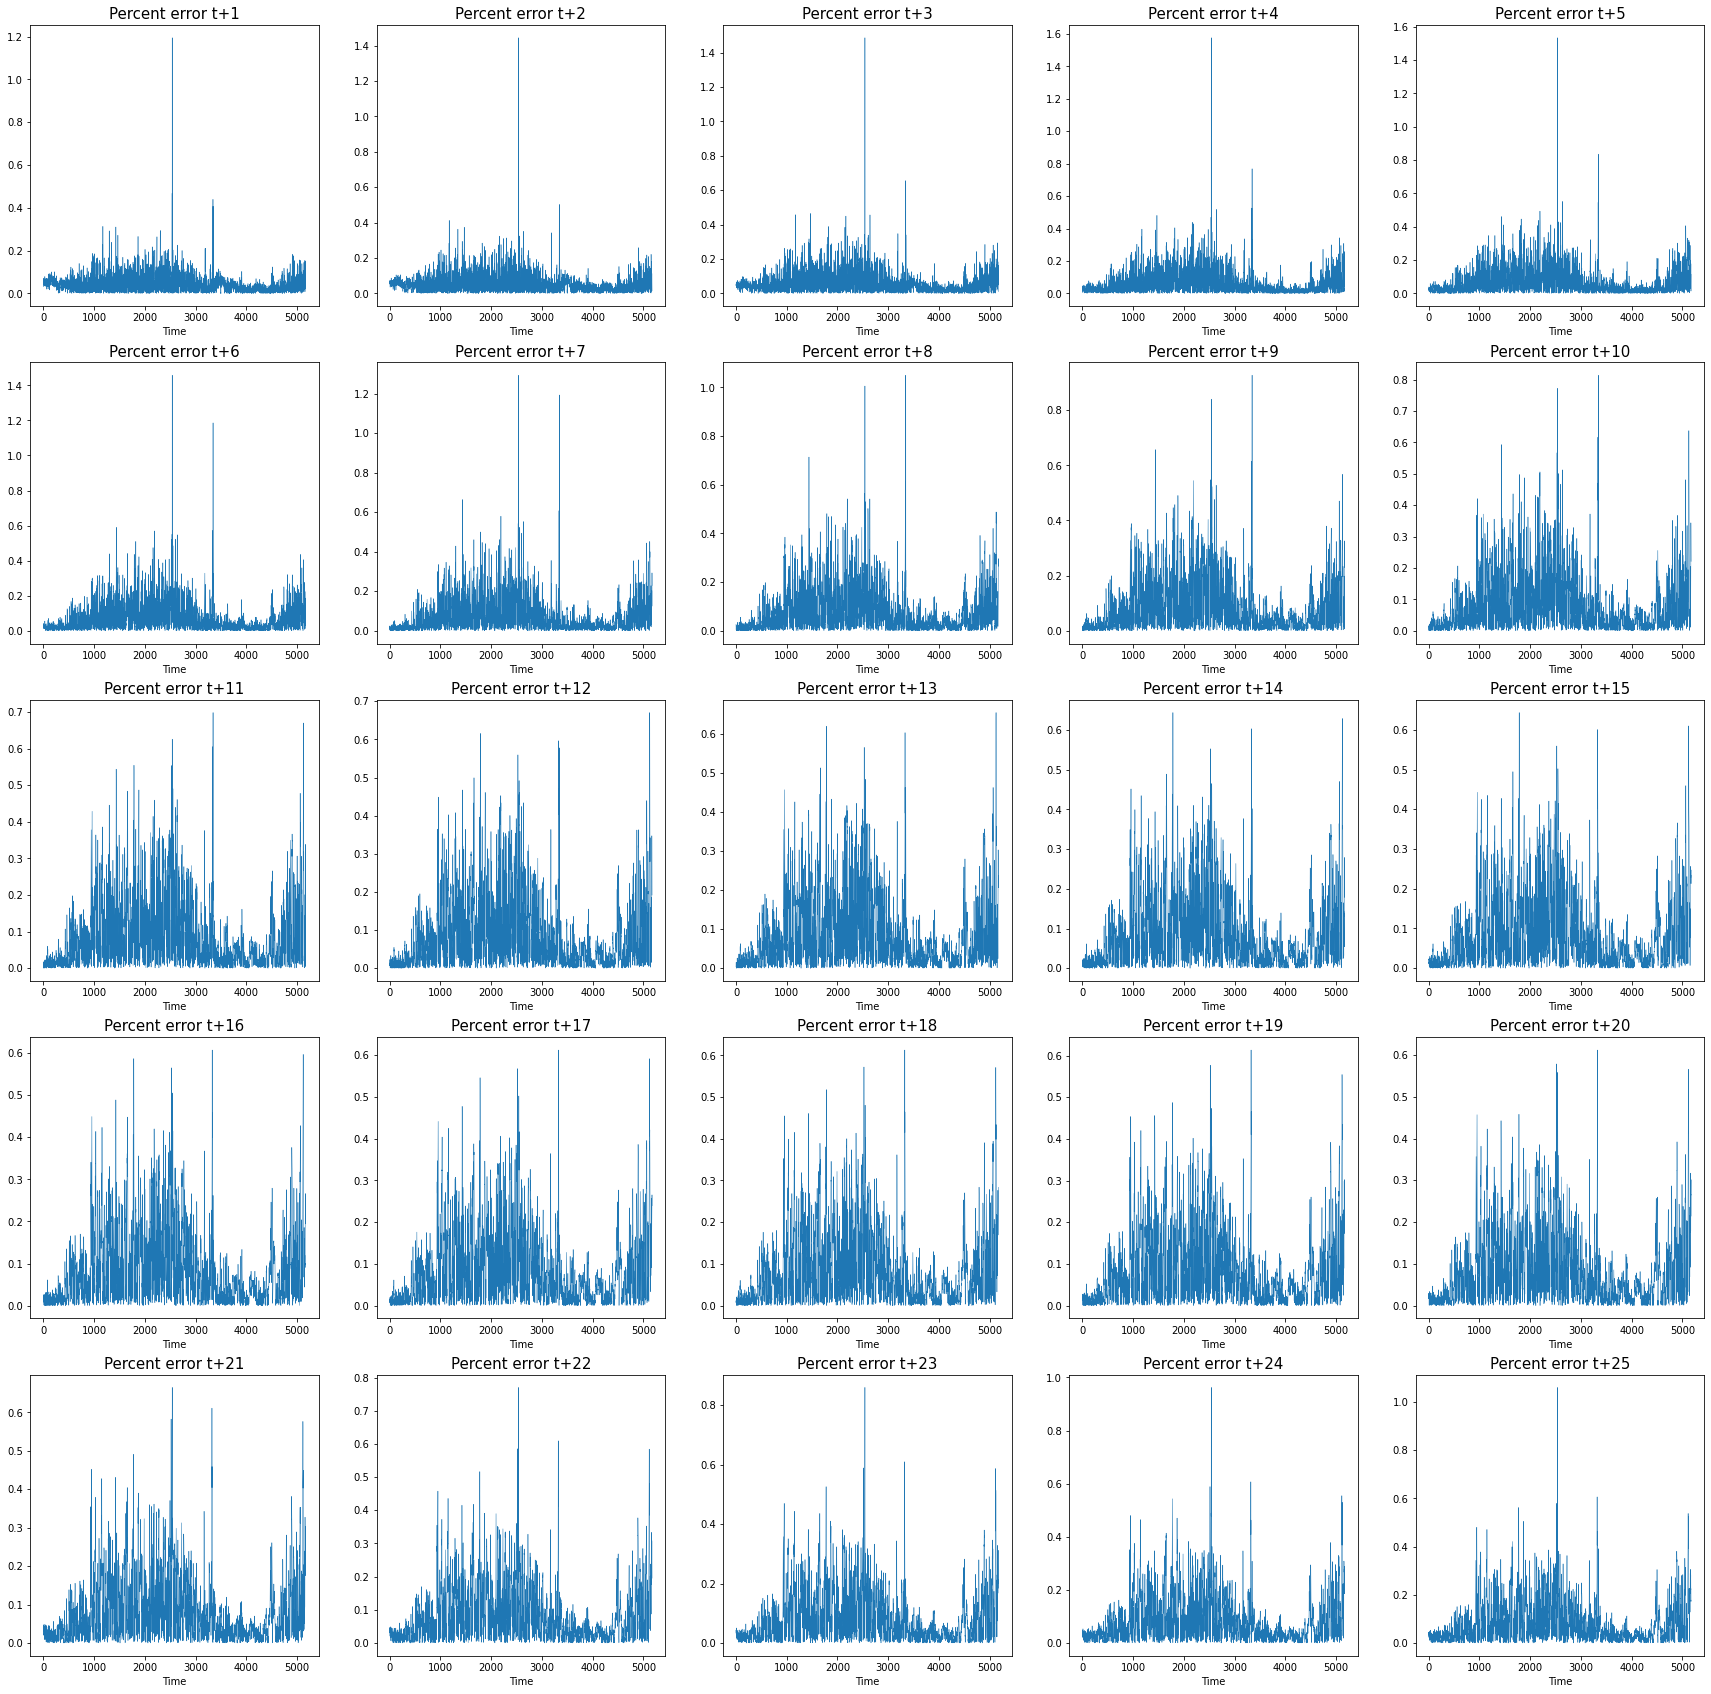

In [44]:
#graphs of +1, ..., +25 percent error
fig, axes = plt.subplots(5, 5, figsize = (30, 30))
for i in range(1,nout-1):
  plt.subplot(5,5,i)
  plt.plot(re[i],lw = 0.5)
  plt.title('Percent error t+%d' % i, fontsize=15)
  plt.xlabel('Time', fontsize = 10)

Text(0.5, 0, 'Time')

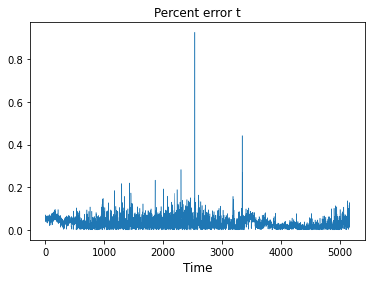

In [45]:
#nowcast percent error
plt.plot(re[0], lw = 0.5)
plt.title('Percent error t')
plt.xlabel('Time', fontsize = 12)

Text(0.5, 0, 'Time')

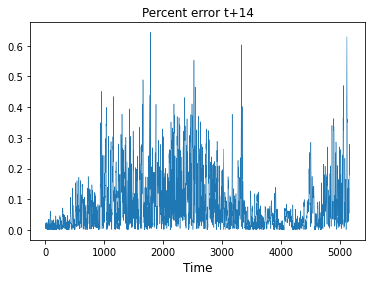

In [46]:
#+14 percent error
plt.plot(re[14], lw = 0.5)
plt.title('Percent error t+14')
plt.xlabel('Time', fontsize = 12)

Text(0.5, 0, 'Time')

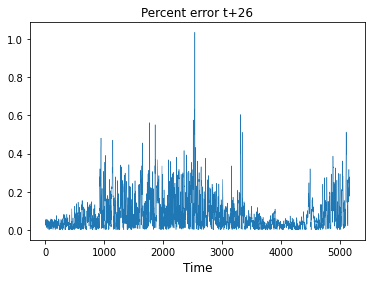

In [47]:
#+26 percent error
plt.plot(re[26], lw = 0.5)
plt.title('Percent error t+26')
plt.xlabel('Time', fontsize = 12)

In [48]:
#compute correlation and show it
correlation = []
for i in range(0,nout):
  correlation.append(obs[i].corr(pred[i]))

correlation

[0.9839540132077929,
 0.9722297273410913,
 0.9573074103313303,
 0.9418711725647038,
 0.9238505380121187,
 0.9087417466361231,
 0.8947107606339393,
 0.8833906083038396,
 0.8747353418625863,
 0.8686504759465449,
 0.8642037816971532,
 0.8611801462720156,
 0.8594486775486994,
 0.8598808341421064,
 0.8609597067006873,
 0.8616720858605257,
 0.8627509335038761,
 0.8643308372317353,
 0.8660180817099113,
 0.867364516790493,
 0.8682210558996497,
 0.86875120450869,
 0.868222751157794,
 0.8668511523439676,
 0.8647200492798126,
 0.8619147540147942,
 0.8577638909680255]

In [49]:
#model evaluation
print(model.evaluate(test_X,test_y))

162/162 [==============================] - 1s 4ms/step - loss: 0.0018
0.0018043755553662777


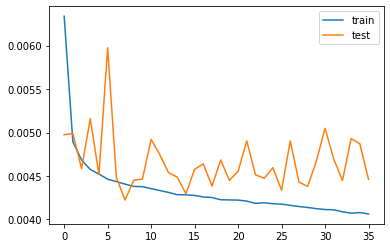

In [50]:
#plot history
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()